# **Titanic - Machine Learning**

#Importing Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Describe Dataset

In [130]:
df_gender_submission = pd.read_csv("/content/drive/MyDrive/Titanics/gender_submission.csv")
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [131]:
df_gender_train = pd.read_csv("/content/drive/MyDrive/Titanics/train.csv")
df_gender_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df_gender_test = pd.read_csv("/content/drive/MyDrive/Titanics/test.csv")
df_gender_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [133]:
df_gender_train.shape

(891, 12)

In [134]:
df_gender_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
df_gender_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Fill in missing values

In [136]:
mean_age = df_gender_train['Age'].dropna().mean()
df_gender_train_no_miss_val = df_gender_train.fillna(mean_age)

In [137]:
df_gender_train_no_miss_val['Age'] = df_gender_train_no_miss_val['Age'].astype(int)
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,29.699118,S


# Data Analysis and Visualization

In [138]:
df_survived_rate = df_gender_train_no_miss_val[["Survived", "Sex"]].groupby("Sex", as_index=False).mean()
df_survived_rate

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [139]:
df_survived_num = df_gender_train_no_miss_val[["Survived", "Sex"]].groupby("Sex", as_index=False).sum()
df_survived_num

,Sex,Survived
0,female,233
1,male,109


In [140]:
print("Female population:", round(233/0.742038) )
print("Male population:", round(109/0.188908) )

Female population: 314
Male population: 577


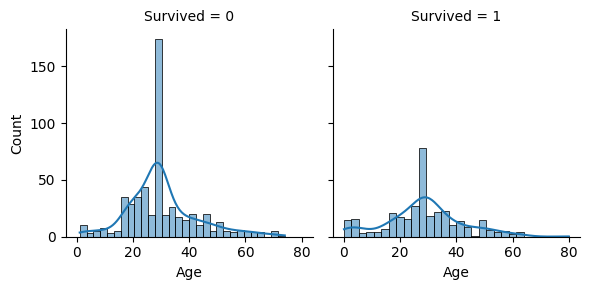

In [141]:
grid = sns.FacetGrid(
    data=df_gender_train_no_miss_val,
    col="Survived"
)
grid.map(sns.histplot, "Age", kde=True, bins=30)

# Replace Categorical feature to numeric feature (Pre Processing data)

### Replace sex values to numerical

In [142]:
gender2id = {"male" : 0, "female": 1}
for data in [df_gender_train_no_miss_val, df_gender_test]:
  data["Sex"] = data["Sex"].map(gender2id)

In [143]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,S


# Fill in missing value on "Embarked" Columns

In [144]:
count_embarked = {"S": 0, "C": 0, "Q": 0}
for val in df_gender_train_no_miss_val["Embarked"]:
  if val == "S":
      count_embarked["S"] += 1
  elif val == "C":
      count_embarked["C"] += 1
  elif val == "Q":
      count_embarked["Q"] += 1
  else:
      pass
count_embarked

{'S': 644, 'C': 168, 'Q': 77}

In [145]:
df_gender_train_no_miss_val["Embarked"] = df_gender_train_no_miss_val["Embarked"].fillna ("S")
df_gender_train_no_miss_val["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

# Convert embarked values to numeric

In [146]:
embarked2id = {"S": 0, "C": 1, "Q": 2}
for data in [df_gender_train_no_miss_val, df_gender_test]:
  data["Embarked"] = data["Embarked"].map(embarked2id)

In [147]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,0.0


In [148]:
df_gender_train_no_miss_val["Embarked"] = df_gender_train_no_miss_val["Embarked"].fillna(0)

In [149]:
df_gender_train_no_miss_val["Embarked"] = df_gender_train_no_miss_val["Embarked"].astype(int)
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,0


In [150]:
df_gender_train_no_miss_val.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [151]:
df_gender_train_no_miss_val["Embarked"] = df_gender_train_no_miss_val["Embarked"].fillna("0")

In [152]:
df_gender_train_no_miss_val["Embarked"] = df_gender_train_no_miss_val["Embarked"].astype(int)
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,29.699118,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,29.699118,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,29.699118,0


#Drop unnecessary columns ("Ticket", "Fare", "Cabin")

In [153]:
for data in [df_gender_train_no_miss_val, df_gender_test]:
    data.drop(["Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [154]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0


# Engineer "Names" column to be a feature

In [155]:
df_gender_train_no_miss_val.Name.str.extract("([A-Za-z]+)\.", expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [156]:
for dataset in [df_gender_train_no_miss_val, df_gender_test]:
    dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.", expand=False)

In [157]:
df_gender_train_no_miss_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,1,Mr


In [158]:
pd.crosstab(df_gender_train_no_miss_val["Title"], df_gender_train_no_miss_val["Sex"])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


## Replace same meaning and title

In [159]:
for dataset in [df_gender_train_no_miss_val, df_gender_test]:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].replace('Mlle','Miss')
    dataset["Title"] = dataset["Title"].replace('Ms', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Mme', 'Miss')

In [160]:
df_gender_train_no_miss_val[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [161]:
df_gender_train_no_miss_val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,0,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,1,Mr


# Drop "Name" Coloumn

In [162]:
for data in [df_gender_train_no_miss_val, df_gender_test]:
    data.drop(["Name"], axis=1, inplace=True)

In [163]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22,1,0,0,Mr
1,2,1,1,1,38,1,0,1,Mrs
2,3,1,3,1,26,0,0,0,Miss
3,4,1,1,1,35,1,0,0,Mrs
4,5,0,3,0,35,0,0,0,Mr


## Convert "Title" categorical values to numeric

In [164]:
title2id = {"Rare": 0, "Master": 1, "Mr": 2, "Mrs": 3, "Miss": 4}
for data in [df_gender_train_no_miss_val, df_gender_test]:
  data["Title"] = data["Title"].map(title2id).astype(int)

In [165]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22,1,0,0,2
1,2,1,1,1,38,1,0,1,3
2,3,1,3,1,26,0,0,0,4
3,4,1,1,1,35,1,0,0,3
4,5,0,3,0,35,0,0,0,2


## Add new column ("IsAlone") correlated to column "SibSp" and "Parch"

In [166]:
for dataset in [df_gender_train_no_miss_val, df_gender_test]:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [167]:
df_gender_train_no_miss_val[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [168]:
for dataset in [df_gender_train_no_miss_val, df_gender_test]:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1

In [169]:
df_gender_train_no_miss_val[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [170]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,22,1,0,0,2,2,0
1,2,1,1,1,38,1,0,1,3,2,0
2,3,1,3,1,26,0,0,0,4,1,1
3,4,1,1,1,35,1,0,0,3,2,0
4,5,0,3,0,35,0,0,0,2,1,1


## Drop column "SibSp", "Parch", "Familysize"

In [171]:
for data in [df_gender_train_no_miss_val, df_gender_test]:
    data.drop(["SibSp", "Parch", "FamilySize"], axis=1, inplace=True)

In [172]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,1,0,3,0,22,0,2,0
1,2,1,1,1,38,1,3,0
2,3,1,3,1,26,0,4,1
3,4,1,1,1,35,0,3,0
4,5,0,3,0,35,0,2,1


## Add new column "AgeBand"

In [173]:
pd.cut(df_gender_train_no_miss_val["Age"], 5).unique()

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]

In [174]:
df_gender_train_no_miss_val["AgeBand"] = pd.cut(df_gender_train_no_miss_val["Age"], 5)

In [175]:
df_gender_train_no_miss_val[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.403226
1,"(16.0, 32.0]",0.344762
4,"(64.0, 80.0]",0.090909


In [176]:
for dataset in [df_gender_train_no_miss_val, df_gender_test]:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"]) <= 32, "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"]) <= 48, "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"]) <= 64, "Age"] = 3
    dataset.loc[(dataset["Age"] > 64), "Age"] = 4

In [177]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone,AgeBand
0,1,0,3,0,3,0,2,0,"(16.0, 32.0]"
1,2,1,1,1,3,1,3,0,"(32.0, 48.0]"
2,3,1,3,1,3,0,4,1,"(16.0, 32.0]"
3,4,1,1,1,3,0,3,0,"(32.0, 48.0]"
4,5,0,3,0,3,0,2,1,"(32.0, 48.0]"


# Drop "AgeBand" column

In [178]:
df_gender_train_no_miss_val.drop(["AgeBand"], axis=1, inplace=True)

In [179]:
df_gender_train_no_miss_val.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,1,0,3,0,3,0,2,0
1,2,1,1,1,3,1,3,0
2,3,1,3,1,3,0,4,1
3,4,1,1,1,3,0,3,0
4,5,0,3,0,3,0,2,1


In [180]:
df_gender_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone
0,892,3,0,3.0,2,2,1
1,893,3,1,3.0,0,3,0
2,894,2,0,3.0,2,2,1
3,895,3,0,3.0,0,2,1
4,896,3,1,3.0,0,3,0


Modelling
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [182]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

bold text# Splitting train data
Pecah data frame latih menjadi data frame latih baru dan data frame validasi (df_train -> df_train_baru & df_val)

In [183]:
df_train, df_test = train_test_split(df_gender_train_no_miss_val, test_size=0.25, random_state=123)

In [184]:
print(df_gender_train_no_miss_val.shape, df_train.shape, df_test.shape)

(891, 8) (668, 8) (223, 8)


Assign to specific X and y variable


In [185]:
X_train = df_gender_train_no_miss_val.drop(["Survived", "PassengerId"], axis=1)
y_train = df_gender_train_no_miss_val["Survived"]
X_test  = df_gender_test.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [186]:
X_tr, X_tt, y_tr, y_tt = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [187]:
print(X_tr.shape, X_tt.shape, y_tr.shape, y_tt.shape)

(668, 6) (223, 6) (668,) (223,)


# Logistic regression

In [188]:
X_tr.head()

,Pclass,Sex,Age,Embarked,Title,IsAlone
660,1,0,3,0,0,0
852,3,1,3,1,4,0
703,3,0,3,2,2,1
886,2,0,3,0,0,1
525,3,0,3,2,2,1


In [189]:
y_tr.head()

660    1
852    0
703    0
886    0
525    0
Name: Survived, dtype: int64

In [190]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [191]:
logreg.coef_

array([[-9.22795437e-01,  3.07535770e+00, -1.02964228e-04,
         3.13708241e-01, -3.34706343e-01, -6.55046102e-02]])

In [192]:
y_pred = logreg.predict(X_tt)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

Check Accuracy

In [193]:
score = accuracy_score(y_tt, y_pred)
score

0.7892376681614349

In [194]:
logreg.n_iter_

array([35], dtype=int32)

In [195]:
logreg_c05 = LogisticRegression(C=0.05)
logreg_c05.fit(X_tr, y_tr)
y_pred = logreg_c05.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7982062780269058

# Coba finetuning untuk C yang berbeda-beda

In [196]:
C_val = np.linspace(0.05, 1.0, 20)
C_val

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [197]:
scores = []
for c in C_val:
  logreg_c = LogisticRegression(C=c)
  logreg_c.fit(X_tr, y_tr)
  y_pred = logreg_c.predict(X_tt)
  score = accuracy_score(y_tt, y_pred)
  scores.append(score)

In [198]:
scores

[0.7982062780269058,
 0.7847533632286996,
 0.7892376681614349,
 0.7892376681614349,
 0.7937219730941704,
 0.7982062780269058,
 0.7982062780269058,
 0.8026905829596412,
 0.8026905829596412,
 0.8026905829596412,
 0.8026905829596412,
 0.8026905829596412,
 0.7892376681614349,
 0.7892376681614349,
 0.7892376681614349,
 0.7892376681614349,
 0.7892376681614349,
 0.7892376681614349,
 0.7892376681614349,
 0.7892376681614349]

<function matplotlib.pyplot.show(close=None, block=None)>

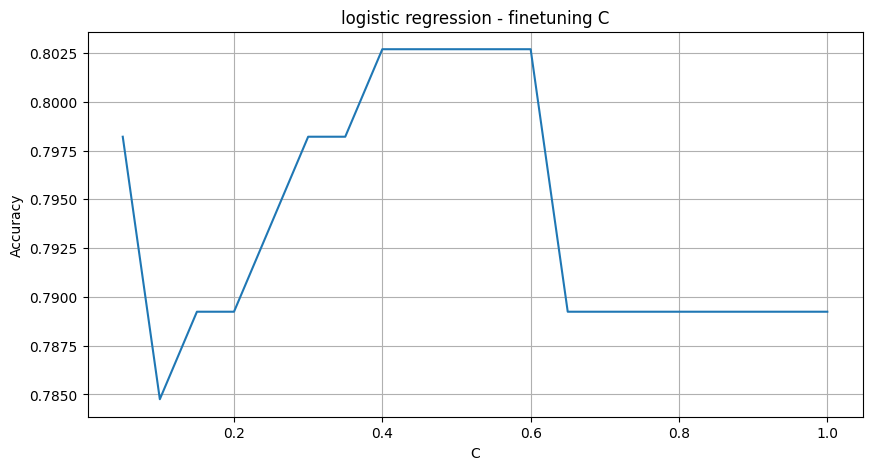

In [199]:
plt.figure(figsize=(10,5))
plt.title("logistic regression - finetuning C")
plt.plot(C_val, scores)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.grid()
plt.show

# SVC

In [200]:
from sklearn.preprocessing import StandardScaler

stdscl = StandardScaler()
stdscl.fit(X_tr)
X_tr_std = stdscl.transform(X_tr)
X_tt_std = stdscl.transform(X_tt)

In [273]:
print(X_tr[0])
print(X_tr_std[0])

[3 0 3 0 2 0]


In [204]:
svc = SVC()
svc.fit(X_tr, y_tr)
y_pred = svc.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.8161434977578476

In [205]:
svc2 = SVC()
svc2.fit(X_tr_std, y_tr)
y_pred = svc2.predict(X_tt_std)
score = accuracy_score(y_tt, y_pred)
score

0.8475336322869955

Test standardize data

In [206]:
C_val

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

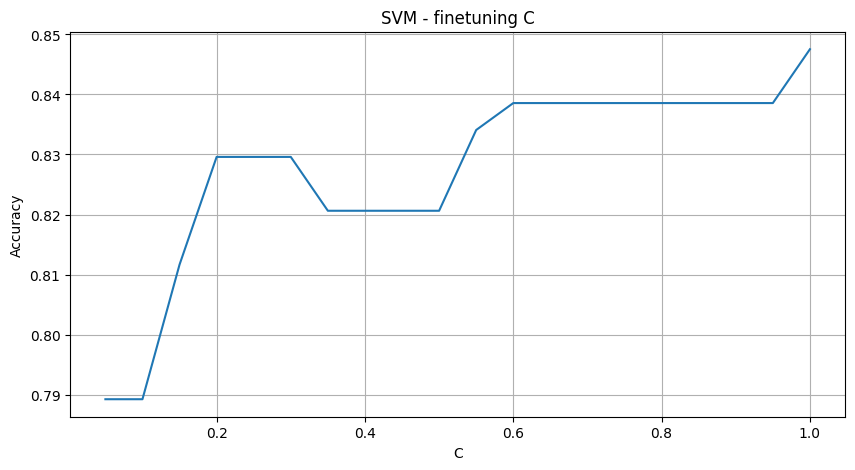

In [207]:
scores = []
for c in C_val:
  svc_c = SVC(C=c)
  svc_c.fit(X_tr_std, y_tr)
  y_pred = svc_c.predict(X_tt_std)
  score = accuracy_score(y_tt, y_pred)
  scores.append(score)

plt.figure(figsize=(10,5))
plt.title("SVM - finetuning C")
plt.plot(C_val, scores)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


# KNN

In [208]:
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)
y_pred = knn.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7982062780269058

In [209]:
# Save KNN Model
import pickle

with open("/content/drive/MyDrive/Titanics/knn.pkl", "wb") as f:
    pickle.dump(knn, f)

In [210]:
# load model
with open("/content/drive/MyDrive/Titanics/knn.pkl", "rb") as f:
    model_knn = pickle.load(f)

y_pred = model_knn.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7982062780269058

# Finetuning dengan K yang berbeda-beda

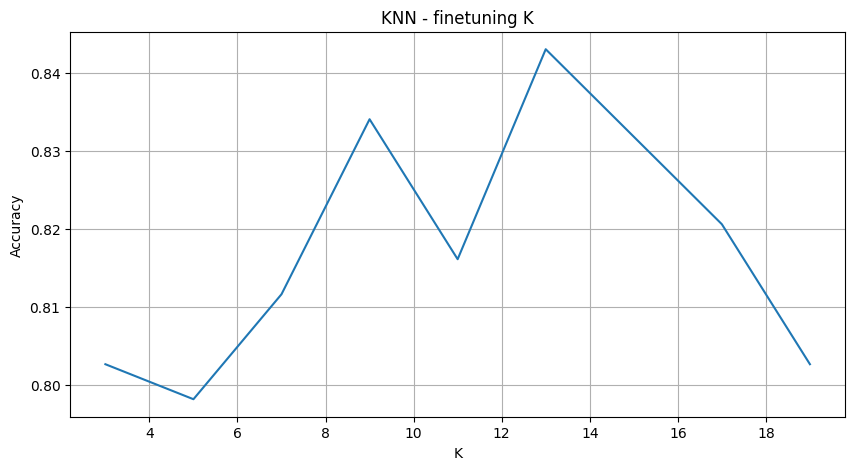

In [211]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

scores = []
Ks = [3,5,7,9,11,13,17,19]
for k in Ks:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title("KNN - finetuning K")
plt.plot(Ks, scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


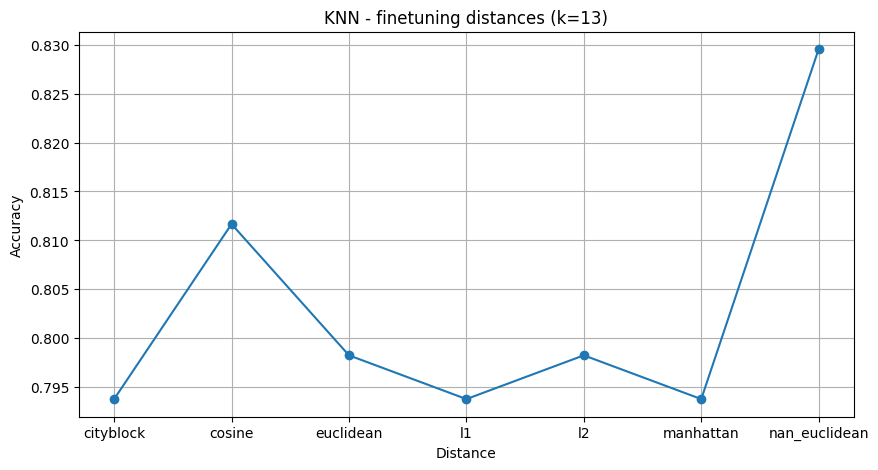

In [212]:
scores = []
distances = ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan", "nan_euclidean"]
for dist in distances:
    knn_k = KNeighborsClassifier(metric=dist)
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title("KNN - finetuning distances (k=13)")
plt.plot(distances, scores, marker='o')  # you missed specifying the marker
plt.xlabel("Distance")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [213]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1,2],[3,4], [1,2], [3,4]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)

print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold{i}:")
    print(f"  Train:index={train_index}")
    print(f"  Train:index={test_index}")

KFold(n_splits=2, random_state=None, shuffle=False)
Fold0:
  Train:index=[2 3]
  Train:index=[0 1]
Fold1:
  Train:index=[0 1]
  Train:index=[2 3]


## Cross Validation

In [214]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=123, shuffle=True)

# Logistic Regression - CV

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


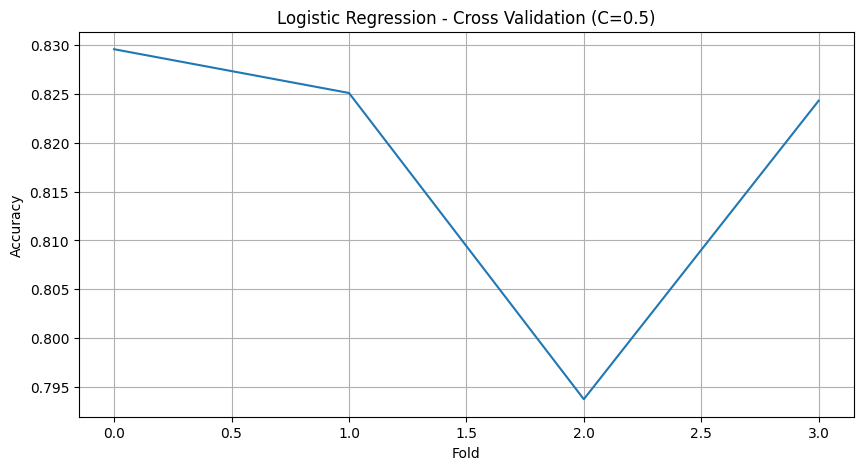

In [215]:
scores = []
fold = []
for idx, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    # Splitting the data
    X_tr = X_train.to_numpy()[train_idx, :]
    X_tt = X_train.to_numpy()[test_idx, :]
    y_tr = y_train[train_idx]
    y_tt = y_train[test_idx]

     # Star Modelling
    logreg = LogisticRegression(C=0.5)
    logreg.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)
    fold.append(idx)

plt.figure(figsize=(10,5))
plt.title("Logistic Regression - Cross Validation (C=0.5)")
plt.plot(fold, scores)  # you missed specifying the marker
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [216]:
print(X_train.shape, y_train.shape)

(891, 6) (891,)


In [217]:
X_train.to_numpy()

array([[3, 0, 3, 0, 2, 0],
       [1, 1, 3, 1, 3, 0],
       [3, 1, 3, 0, 4, 1],
       ...,
       [3, 1, 3, 0, 4, 0],
       [1, 0, 3, 1, 2, 1],
       [3, 0, 3, 2, 2, 1]])

## KNN Cross Validation

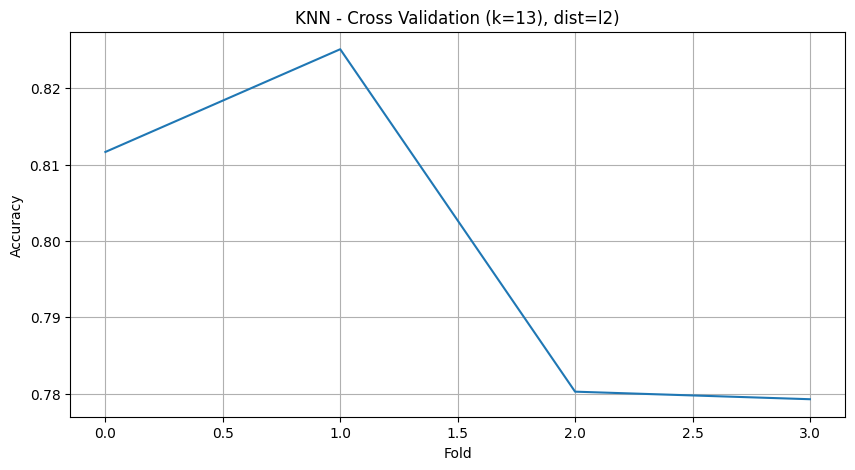

In [218]:
scores = []
fold = []
for idx, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    # Splitting the data
    X_tr = X_train.to_numpy()[train_idx, :]
    X_tt = X_train.to_numpy()[test_idx, :]
    y_tr = y_train[train_idx]
    y_tt = y_train[test_idx]

     # Star Modelling
    knn_k = KNeighborsClassifier(n_neighbors=13, metric='l2')
    knn_k.fit(X_tr, y_tr)
    y_pred = knn_k.predict(X_tt)
    score = accuracy_score(y_tt, y_pred)
    scores.append(score)
    fold.append(idx)

plt.figure(figsize=(10,5))
plt.title("KNN - Cross Validation (k=13), dist=l2)")
plt.plot(fold, scores)  # you missed specifying the marker
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## Neural Network

In [219]:
mlp = MLPClassifier(verbose=False, max_iter=500, random_state=123)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7747747747747747

## Finetuning by Adjust n_layer

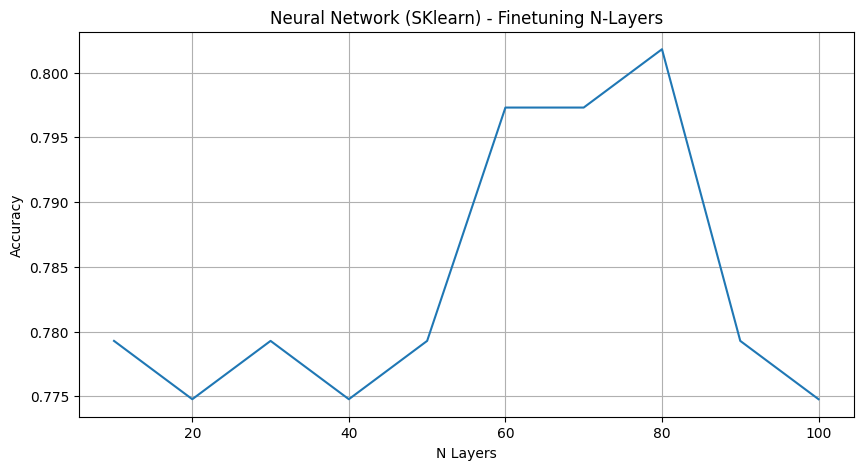

In [220]:
layers = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
scores = []
for layer in layers:
  mlp = MLPClassifier(verbose=False, max_iter=1000, random_state=123, hidden_layer_sizes=layer)
  mlp.fit(X_tr, y_tr)
  y_pred = mlp.predict(X_tt)
  score = accuracy_score(y_tt, y_pred)
  scores.append(score)

plt.figure(figsize=(10,5))
plt.title("Neural Network (SKlearn) - Finetuning N-Layers")
plt.plot(layers, scores)
plt.xlabel("N Layers")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

## NN using tensorflow

In [221]:
import tensorflow as tf

## Loading data (MNIST) Example

In [222]:
mnist = tf.keras.datasets.fashion_mnist

(X_m_tr, y_m_tr), (X_m_tt, y_m_tt) = mnist.load_data()

In [223]:
print(X_m_tr.shape, X_m_tt.shape, y_m_tr.shape, y_m_tt.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [224]:
X_m_tr[0, :, :].shape

(28, 28)

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

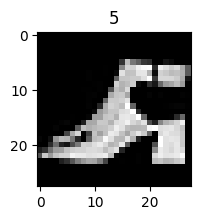

In [225]:
idx = 9922
plt.figure(figsize=(2,2))
plt.imshow(X_m_tt[idx, :, :], cmap="gray")
plt.title(y_m_tt[idx])
plt.imshow

## Continue to use titanic Dataset on NN

In [226]:
print(X_tr.shape, X_tt.shape, y_tr.shape, y_tt.shape)

(669, 6) (222, 6) (669,) (222,)


In [227]:
epoch = 300

seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(6,)),
    tf.keras.layers.Dense(12, activation='relu'),
  #   tf.keras.layers.Dropout(0.2)
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10, restore_best_weights=True)
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
history = model.fit(X_tr, y_tr, epochs=epoch, validation_data=(X_tt, y_tt), callbacks=[es])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 12)                84        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
21/21 [==============================] - 1s 12ms/step - loss: 0.9628 - accuracy: 0.3662 - val_loss: 0.6852 - val_accuracy: 0.4459
Epoch 

In [228]:
result = history.history
n_epochs = np.arange(0,len(result['accuracy']))

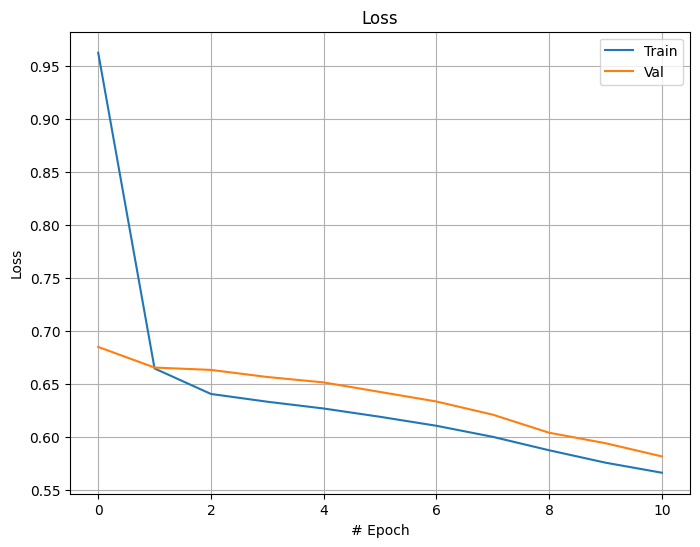

In [229]:
plt.figure(figsize=(8,6))
plt.title('Loss')
plt.plot(n_epochs, result['loss'])
plt.plot(n_epochs, result['val_loss'])
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

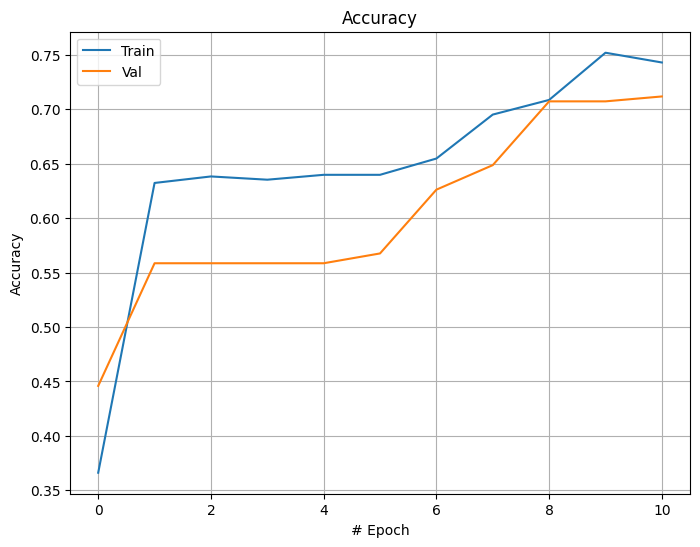

In [230]:
plt.figure(figsize=(8,6))
plt.title('Accuracy')
plt.plot(n_epochs, result['accuracy'])
plt.plot(n_epochs, result['val_accuracy'])
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

## Naives Bayes

In [231]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb.fit(X_tr, y_tr)
y_pred = mnb.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

0.7792792792792793

In [232]:
model.save("/content/drive/MyDrive/Titanics/best_model.keras")

In [233]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Titanics/best_model.keras")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 12)                84        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169 (676.00 Byte)
Trainable params: 169 (676.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [234]:
model.evaluate(X_tt, y_tt)

7/7 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.4459


[0.6851695775985718, 0.44594594836235046]

In [235]:
y_pred = model.predict(X_tt)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[0.5950641 ],
       [0.5866393 ],
       [0.5772164 ],
       [0.5950641 ],
       [0.5674098 ],
       [0.5345666 ],
       [0.57581407],
       [0.57403386],
       [0.55872947],
       [0.52091336],
       [0.60576135],
       [0.5974964 ],
       [0.5217913 ],
       [0.55212075],
       [0.52091336],
       [0.59670234],
       [0.5413114 ],
       [0.5539651 ],
       [0.52091336],
       [0.52091336],
       [0.5413114 ],
       [0.52091336],
       [0.60960644],
       [0.5356044 ],
       [0.49513736],
       [0.5901468 ],
       [0.53719896],
       [0.5950641 ],
       [0.5908117 ],
       [0.57581407],
       [0.52091336],
       [0.59670234],
       [0.60576135],
       [0.52091336],
       [0.5217913 ],
       [0.48267913],
       [0.49513736],
       [0.5686648 ],
       [0.5950641 ],
       [0.52091336],
       [0.52091336],
       [0.52091336],
       [0.53186154],
       [0.59670234],
       [0.58856326],
       [0.5437497 ],
       [0.51765436],
       [0.547

In [236]:
# Thresholding logits outputs
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

In [237]:
score = accuracy_score(y_tt, y_pred)
score

0.44594594594594594

## PCA

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_tr)
X_tr_pca = pca.transform(X_tr)
X_tt_pca = pca.transform(X_tt)

Logistic Regression

In [239]:
y_pred = logreg.predict(X_tt)

In [240]:
score = accuracy_score(y_tt, y_pred)
score

0.7837837837837838

In [241]:
pca.explained_variance_

array([1.091841  , 0.70486035])

# K-Means Clustering

In [242]:
from sklearn.cluster import KMeans

In [243]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_tt)
score = accuracy_score(y_tt, y_pred)
score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.7837837837837838

## Implement elobow plot approach (Check best K)

In [301]:
def get_total_std_by_classes(X, y):
    labels = np.unique(y)
    dist_total = 0  # Initialize dist_total here
    for label in labels:
        indices = np.where(y == label)[0]
        X_filtered = X[indices]
        mean_X = np.mean(X_filtered)
        distortion = np.sum(X_filtered - mean_X)
        dist_total += distortion  # Accumulate distortion
    return dist_total


In [302]:
ks = [1, 2, 3, 4, 5, 6]
all_std_tr = []
all_std_tt = []

for k in ks:
    kmeans_k = KMeans(n_clusters=k, random_state=123)
    kmeans_k.fit(X_tr)
    y_pred_tr = kmeans_k.predict(X_tr)
    y_pred_tt = kmeans_k.predict(X_tt)
    std_total_tr = get_total_std_by_classes(X_tr, y_pred_tr)
    std_total_tt = get_total_std_by_classes(X_tt, y_pred_tt)
    all_std_tr.append(std_total_tr)
    all_std_tt.append(std_total_tt)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

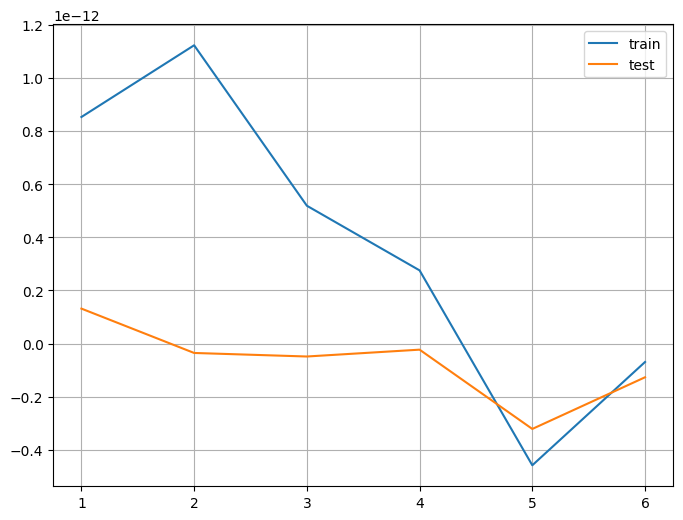

In [303]:
plt.figure(figsize=(8,6))
plt.plot(ks, all_std_tr)
plt.plot(ks, all_std_tt)
plt.grid()
plt.legend(['train', "test"])
plt.show

In [304]:
scores = [abs(all_std_tr[1] - all_std_tr[0]), abs(all_std_tr[2] - all_std_tr[1]), abs(all_std_tr[4] - all_std_tr[3])]
print(scores)
print(max(scores))

[2.7000623958883807e-13, 6.039613253960852e-13, 7.336353746723034e-13]
7.336353746723034e-13


In [305]:
X_tr.shape

(669, 6)

In [306]:
np.where(y_pred_tr==0)[0]

array([  1,   6,   8,  11,  25,  34,  36,  42,  43,  48,  52,  64,  98,
       100, 111, 119, 124, 134, 144, 147, 149, 158, 162, 172, 179, 188,
       195, 196, 203, 204, 206, 209, 223, 228, 230, 234, 235, 237, 238,
       239, 242, 244, 248, 250, 255, 258, 262, 263, 272, 276, 279, 284,
       289, 292, 294, 301, 312, 313, 318, 319, 323, 325, 327, 330, 340,
       341, 364, 369, 375, 377, 379, 382, 385, 393, 396, 401, 410, 420,
       422, 425, 426, 429, 434, 441, 454, 462, 469, 490, 491, 507, 517,
       522, 524, 526, 532, 540, 544, 557, 560, 563, 571, 580, 585, 586,
       601, 607, 615, 627, 632, 638, 639, 641, 646, 649, 650, 654, 656,
       661, 662])

In [307]:
idx = np.where(y_pred_tr==0)[0]

In [308]:
np.std(X_tr[idx])

1.2880525292090035

using standardize data

In [309]:
ks = [1, 2, 3, 4, 5, 6]
all_std_tr = []
all_std_tt = []

for k in ks:
    kmeans_k = KMeans(n_clusters=k, random_state=123)
    kmeans_k.fit(X_tr_std)
    y_pred_tr = kmeans_k.predict(X_tr_std)
    y_pred_tt = kmeans_k.predict(X_tt_std)
    std_total_tr = get_total_std_by_classes(X_tr_std, y_pred_tr)
    std_total_tt = get_total_std_by_classes(X_tt_std, y_pred_tt)
    all_std_tr.append(std_total_tr)
    all_std_tt.append(std_total_tt)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

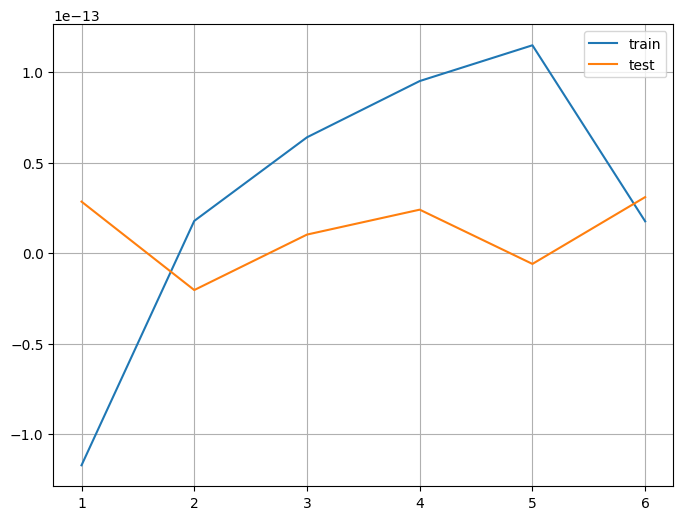

In [310]:
plt.figure(figsize=(8,6))
plt.plot(ks, all_std_tr)
plt.plot(ks, all_std_tt)
plt.grid()
plt.legend(['train', "test"])
plt.show